<a href="https://colab.research.google.com/github/subin100/DataVisualization/blob/main/Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Subin Manandhar
##Data Visualization
##Instructor: Dr Nicholas Jacob
##Recreating the Masters

I am going to recreate the graph given below

![Premier league](https://www.thesun.co.uk/wp-content/uploads/2022/02/jb-graphic-pl-mangers-salaries-v2-1.jpg)

Lets import all the resources we required before we begin the project.

In [52]:
import requests
import pandas as pa
import seaborn as sns
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [53]:
r = requests.get('https://www.sportingfree.com/football/premier-league-managers-salaries/')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
len(html_soup.find_all('table'))

1

In [54]:
html_soup.title

<title>Premier League Managers Salaries 2022-22: Highest Paid Manager in EPL</title>

So we got the table we needed for this table.
But we have to convert (Base salary) to integer to work on the table because it is in the string format.

In [89]:
tables = html_soup.find_all('table')

df = pa.read_html(str(tables))[0]
df1 = pa.read_html(str(tables))[0]
df

,Manager,Base Salary,Weekly Wage,Club,Contract
0,Pep Guardiola,£20 million,"£417,500",Manchester City,2021
1,Jürgen Klopp,£15 million,"£313,500",Liverpool,2024
2,José Mourinho,£15 million,"£313,000",Tottenham,2023
3,Carlo Ancelotti,£11 million,"£230,000",Everton,2024
4,Frank Lampard,£8 million,"£166,850",Chelsea,2022
5,Marcelo Bielsa,£8 million,"£166,660",Leeds United,2022
6,Ole Gunnar Solskjær,£7.8 million,"£160,000",Manchester United,2022
7,Mikel Arteta,£5 million,"£105,000",Arsenal,2023
8,Brendan Rodgers,£5 million,"£105,000",Leicester City,2025
9,Roy Hodgson,£4.5 million,"£93,750",Crystal Palace,2021


Checking data types of all the columns

In [90]:
df.columns

Index(['Manager', 'Base Salary', 'Weekly Wage', 'Club', 'Contract'], dtype='object')

Now lets remove £ and ',' from base salary and then change the data type to float.

In [91]:
df1['Base Salary'] = df1['Base Salary'].str.replace('£','').str.replace(',','').str.replace('million','')
df1['Base Salary'] = pd.to_numeric(df1['Base Salary'])

df1

,Manager,Base Salary,Weekly Wage,Club,Contract
0,Pep Guardiola,20.00,"£417,500",Manchester City,2021
1,Jürgen Klopp,15.00,"£313,500",Liverpool,2024
2,José Mourinho,15.00,"£313,000",Tottenham,2023
3,Carlo Ancelotti,11.00,"£230,000",Everton,2024
4,Frank Lampard,8.00,"£166,850",Chelsea,2022
5,Marcelo Bielsa,8.00,"£166,660",Leeds United,2022
6,Ole Gunnar Solskjær,7.80,"£160,000",Manchester United,2022
7,Mikel Arteta,5.00,"£105,000",Arsenal,2023
8,Brendan Rodgers,5.00,"£105,000",Leicester City,2025
9,Roy Hodgson,4.50,"£93,750",Crystal Palace,2021


In [83]:
df1.dtypes

Manager         object
Base Salary    float64
Weekly Wage     object
Club            object
Contract         int64
dtype: object

It worked as we can see data type of Weekly wage is converted to int

I am going to drop column 18 and 19 because it is creating lots of problems when plotted in graph because their base salary is not in millions.
I might make it work for my final project though.

In [92]:
df1 = df1.drop([18,19])

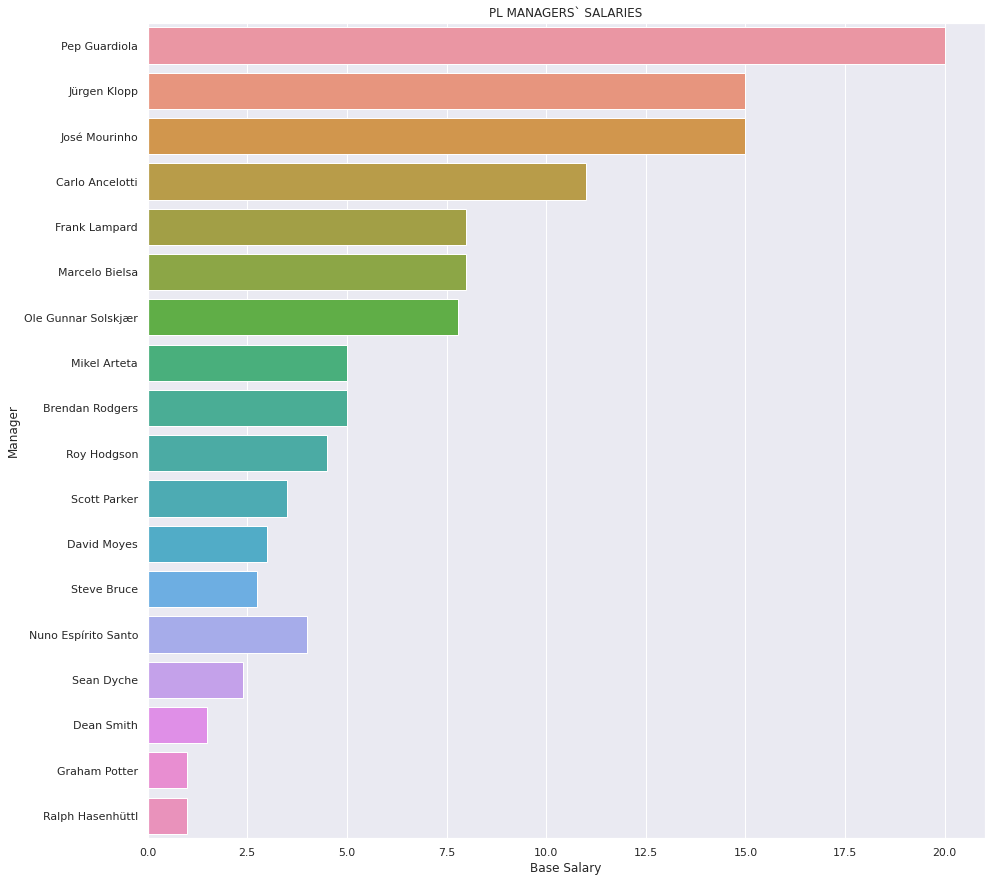

In [107]:
ax = sns.barplot(data = df1 , x= 'Base Salary', y= "Manager", hue_order= None )
sns.set(rc={'figure.figsize':(15,15)})
ax.set_title('PL MANAGERS` SALARIES')
plt.show()